# LLRB Trees

The LLRB Tree (left-leaning red-black tree) is a data structure, i.e. a way to store data that supports certain operations.

A tree is a structure that saves data in nodes, which are pairs of keys and values. It must have a root node which has no parent node, and is linked to children that are also nodes, which can be linked to ther nodes and so on.

This tree is binary, which means that any node can only have two children, if it doesn't have a node in one of its two vacants we will call that a leaf.

The ordering of the tree is achieved via the keys. In this case, the left child has a lesser value, the right one is greater and if the key is the same we replace the corresponding value.
<img src="binary_ep1.svg" height=100px width=100px>

The main idea behind these trees is to keep them balanced. That is that any path from the root of the tree to a an em

In [1]:
include("llrbtree.jl")

INFO: Initializing package repository /home/juser/.julia/v0.3
INFO: Cloning METADATA from git://github.com/JuliaLang/METADATA.jl


In [2]:
function populate(tree::LLRBTrees.LLRBTree, N::Int64)
    for i in 1:N
        r = rand(0:100)
        push!(tri, r, r*2 )
    end
end

populate (generic function with 1 method)

In [3]:
tri=LLRBTrees.LLRBTree()

LLRBTree(TreeLeaf(false))

In [4]:
populate(tri,3)

In [5]:
LLRBTrees.orderedpairs(tri);

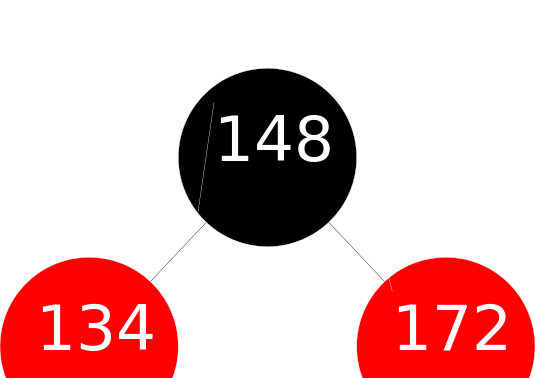

In [6]:
LLRBTrees.LLRBVisualize.drawtree(tri)

It's an svg so we can do infinite zooming

In [16]:
import Compose

In [19]:
img = Compose.SVG("tree.svg", 10Compose.cm, 10Compose.cm)
Compose.draw(img, treevisual)